In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import time
import urllib.request

In [ ]:
zip_path="/content/character dataset.zip"
import zipfile
import os
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_folder")

In [ ]:
def read_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)
    return image

def plot_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def img_to_arr(x):
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(64,64))
    return img

In [ ]:
df = pd.read_csv("/content/unzipped_folder/english.csv")
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [ ]:
df['image']

,image
0,Img/img001-001.png
1,Img/img001-002.png
2,Img/img001-003.png
3,Img/img001-004.png
4,Img/img001-005.png
...,...
3405,Img/img062-051.png
3406,Img/img062-052.png
3407,Img/img062-053.png
3408,Img/img062-054.png


In [ ]:
df['image'] = "/content/unzipped_folder/" + df['image'].astype(str)
df.head()

,image,label
0,/content/unzipped_folder/Img/img001-001.png,0
1,/content/unzipped_folder/Img/img001-002.png,0
2,/content/unzipped_folder/Img/img001-003.png,0
3,/content/unzipped_folder/Img/img001-004.png,0
4,/content/unzipped_folder/Img/img001-005.png,0


In [ ]:
df['image'][0]

'/content/unzipped_folder/Img/img001-001.png'

(64, 64)


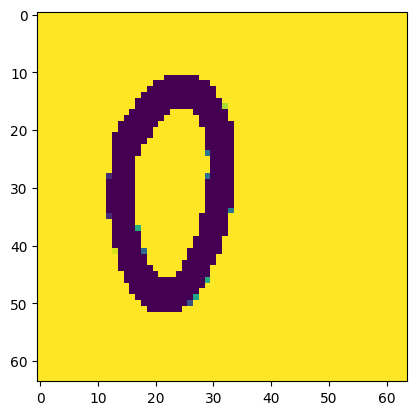

In [ ]:
print(img_to_arr(df['image'][0]).shape)
plt.imshow(img_to_arr(df['image'][0]))

In [ ]:
start_time = time.time()
import multiprocessing

with multiprocessing.Pool(4) as p:
    images = p.map(img_to_arr, df['image'])
end_time = time.time()
print("with multiprocessing:", end_time-start_time)

with multiprocessing: 46.3570442199707


In [ ]:
x = np.array(images).reshape(3410, 64, 64,1)
x.shape

(3410, 64, 64, 1)

2


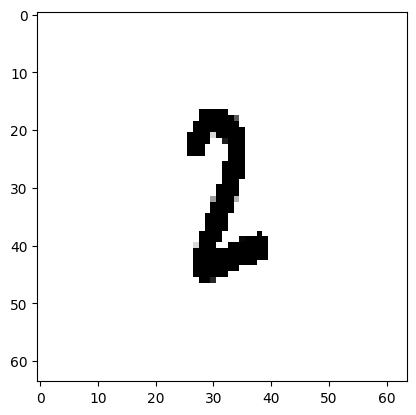

In [ ]:
img = x[119].reshape((64,64))
plt.imshow(img,cmap='gray')
print(df['label'].iloc[119])

In [ ]:
y = df['label']
le = LabelEncoder()
y_label = le.fit_transform(y)

In [ ]:
train_images,test_images,train_labels,test_labels = train_test_split(x,y_label,test_size=0.2,random_state=42)
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,validation_data = (test_images,test_labels))

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 497s 6s/step - accuracy: 0.0111 - loss: 4.2155 - val_accuracy: 0.0132 - val_loss: 4.0946
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 504s 6s/step - accuracy: 0.0505 - loss: 3.8290 - val_accuracy: 0.1129 - val_loss: 3.2901
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 474s 5s/step - accuracy: 0.1683 - loss: 2.9985 - val_accuracy: 0.1994 - val_loss: 2.7490
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 508s 5s/step - accuracy: 0.2961 - loss: 2.3863 - val_accuracy: 0.3035 - val_loss: 2.3030
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 504s 6s/step - accuracy: 0.4960 - loss: 1.7927 - val_accuracy: 0.4809 - val_loss: 1.7012
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 481s 6s/step - accuracy: 0.6319 - loss: 1.2643 - val_accuracy: 0.5894 - val_loss: 1.3975
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 498s 6s/step - accuracy: 0.7383 - loss: 0.9105 - val_accuracy: 0.6496 - val_loss: 1.1798
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.8357 - loss: 0.6211 - val_accuracy: 0.6950 - v

In [ ]:
model.save('character_recognition_model.h5')

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 512)    │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,099,324 (88.12 MB)

 Trainable params: 7,699,774 (29.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,399,550 (58.74 MB)

In [ ]:
predicted_labels = le.inverse_transform(model.predict(test_images).argmax(axis=1))
actual_labels = le.inverse_transform(test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step


In [ ]:
print('predicted label is ;',predicted_labels[67])
print('Actual Label is :',actual_labels[67])

predicted label is ; j
Actual Label is : j


# if you want to test by yourself

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the image you uploaded
image_path = '/content/326.png'  # change to your file name

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize to the input size expected by your model
img_resized = cv2.resize(img, (64, 64))  # Resized to (64, 64)

# Normalize
img_normalized = img_resized / 255.0

# Reshape to match the model input
img_input = img_normalized.reshape(3410, 64, 64, 1)  # Reshaped to (1, 64, 64, 1)

# Visualize the image
plt.imshow(img_resized, cmap='gray')
plt.title("Input Image")
plt.show()

ValueError: cannot reshape array of size 4096 into shape (3410,64,64,1)

In [ ]:
prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print("Predicted label:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted label: 44


printed label : B
actual label : B


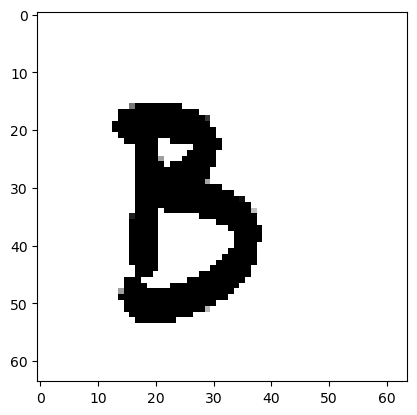

In [ ]:
# number of image to be predicted
# change the value of I
i = 450



plt.imshow(test_images[i],cmap='gray')
print('printed label :',predicted_labels[i])
print('actual label :', actual_labels[i])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 [==============================] - 0s 8ms/step
Accuracy: 0.7448680351906158
Precision: 0.7576027173954981
Recall: 0.7448680351906158
F1 Score: 0.7430856064716895
Confusion Matrix:
[[ 7  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  7]]
